# Lab 7
Seuillage global et adaptatif.

In [7]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed

In [6]:
dict = {
    '00010001' : 'allo',
    'b' : 2,
    'c' : 3,
}

print(dict)

print(dict['00010001'])

if 'b' in dict:
    print('yes')
else:
    print('no')


class WrapperDict:
    dict = {}

    def __init__(self):
        self.dict = {}

    def __getitem__(self, key):
        if key in self.dict:
            return self.dict[key]
        else:
            return None

    def __setitem__(self, key, value):
        self.dict[key] = value

wrapper_dict = WrapperDict()
wrapper_dict['allo'] = 2

{'00010001': 'allo', 'b': 2, 'c': 3}
allo
yes


## Exercice 1
Segmenter l'avant-plan de l'image avec le threshold d'Otsu. Avec le masque obtenu, retirer l'arrière-plan de l'image et afficher la.
> Utiliser la fonction `skimage.filters.threshold_otsu`

img dtype: uint8
mask dtype: bool
seg dtype: uint8


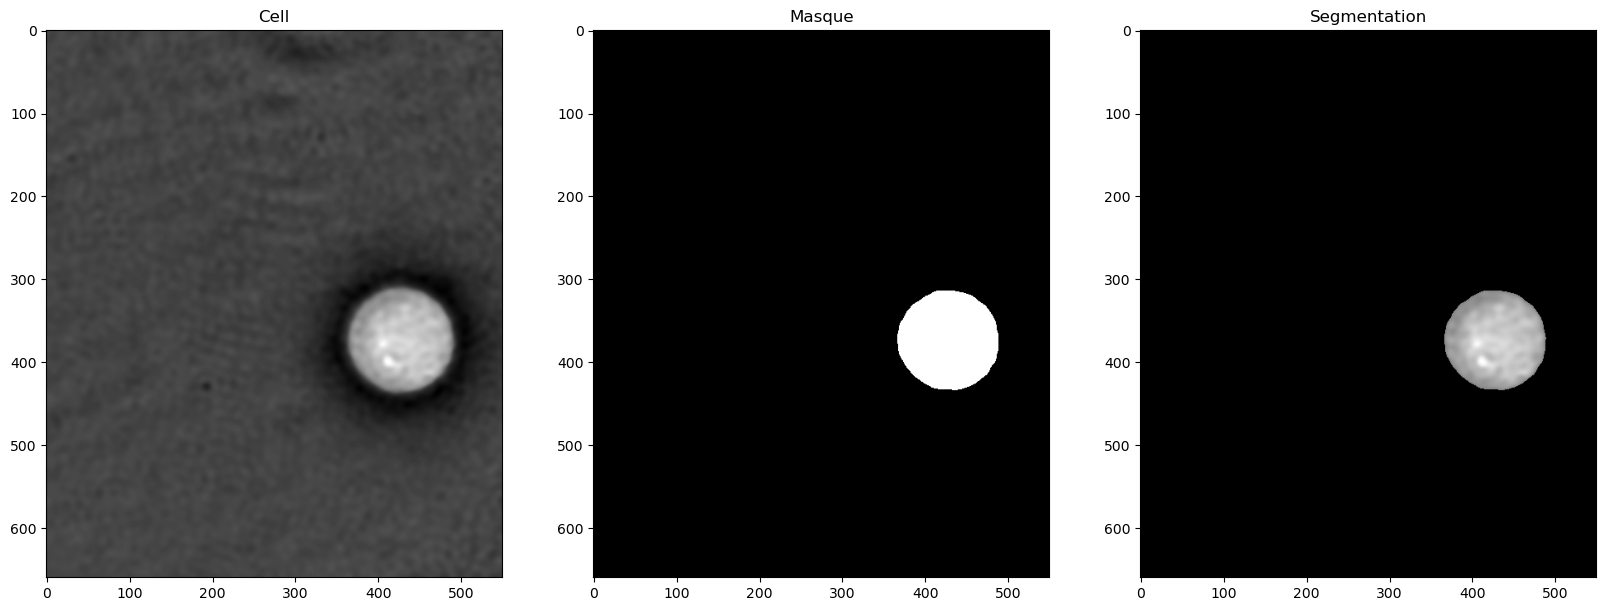

In [30]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')
print(f'img dtype: {img.dtype}')

threshold = 128
mask = img > threshold
print(f'mask dtype: {mask.dtype}')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

# seg_manuel = img.copy() * mask
seg_manuel = img.copy()
seg_manuel[img < threshold] = 0
print(f'seg dtype: {seg_manuel.dtype}')
plt.subplot(133); plt.imshow(seg_manuel, cmap='gray'); plt.title('Segmentation')

plt.show()

value : 122


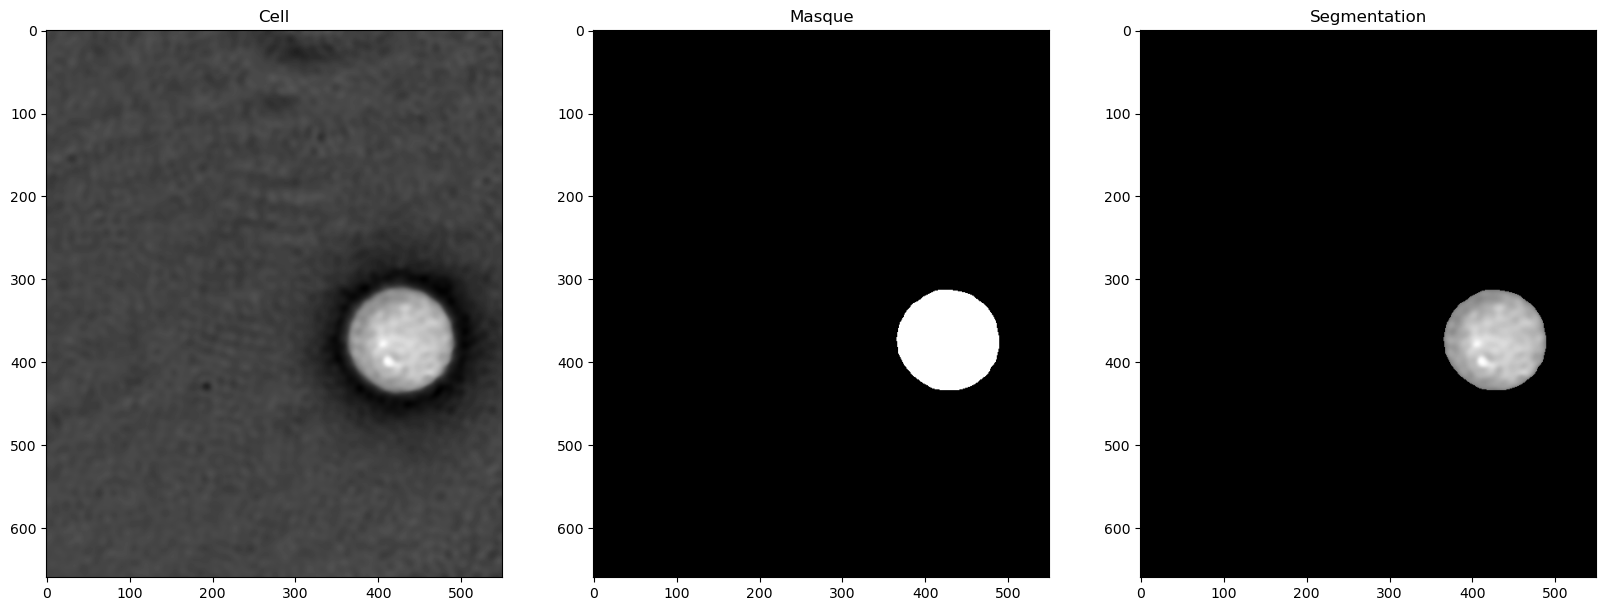

In [21]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

mask_ostu = filters.threshold_otsu(img)
mask = img > mask_ostu
print(f'value : {mask_ostu}')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg_otsu = img.copy() * mask
plt.subplot(133); plt.imshow(seg_otsu, cmap='gray'); plt.title('Segmentation')

plt.show()

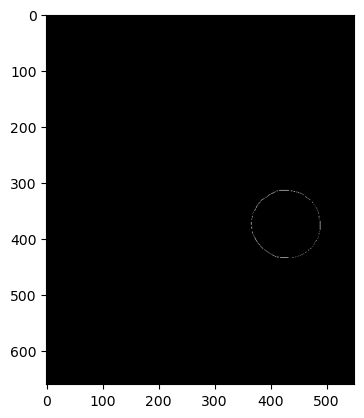

In [22]:
diff = seg_manuel - seg_otsu
plt.imshow(diff, cmap='gray')
plt.show()

## Exercice 2
Segmenter l'arrière-plan de l'image avec le threshold de Li. Avec le masque obtenu, retirer l'avant-plan de l'image et afficher l'arrière-plan..
> Utiliser la fonction `skimage.filters.threshold_li`

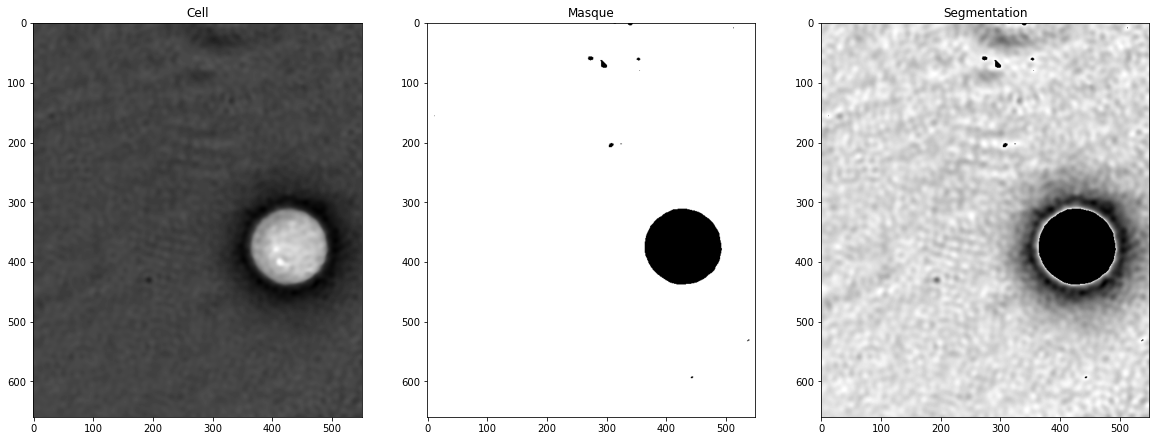

In [55]:
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

threshold = ...
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = ...
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 3
Segmenter l'arrière-avant de l'image en suivant ces étapes:
- Trouver les coutours avec Sobel (`skimage.filters.sobel`)
- Utiliser la méthode watershed avec le `markers` déjà définit et les coutours trouver avec Sobel comme carte d'élévation (`skimage.segmentation.watershed`)
> Pris de https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

mask dtype: uint8
min : 1
max : 2


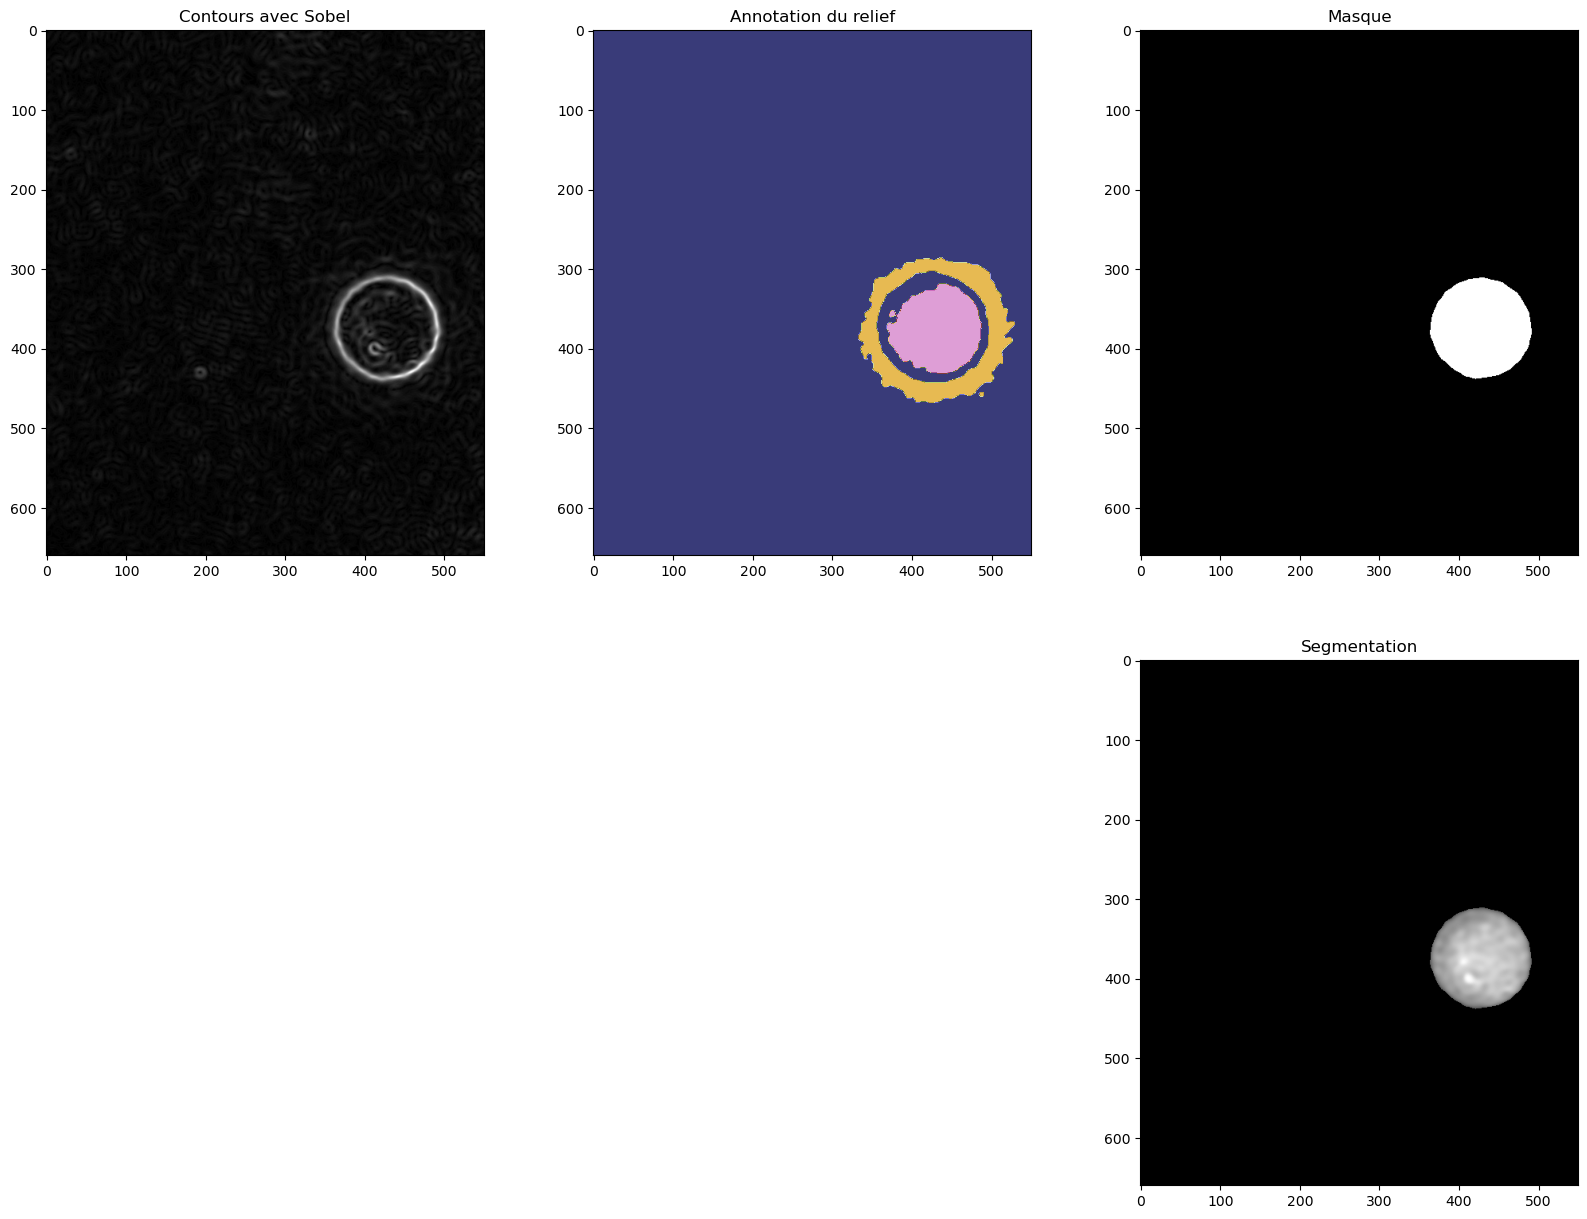

In [37]:
plt.figure(figsize=(20, 15))

elevation_map = filters.sobel(img)
plt.subplot(231); plt.imshow(elevation_map, cmap='gray'); plt.title('Contours avec Sobel')

markers = np.zeros_like(img)
markers[img < 30] = 1
markers[img > 150] = 2
plt.subplot(232); plt.imshow(markers, cmap='tab20b'); plt.title('Annotation du relief')

mask = watershed(elevation_map, markers)
print(f'mask dtype: {mask.dtype}')
print(f'min : {mask.min()}')
print(f'max : {mask.max()}')
mask = mask - mask.min()
plt.subplot(233); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy()
seg = seg * mask
# seg[mask == 1] = 0
plt.subplot(236); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()